In [14]:
# Dependencies

import pandas as pd

from prophet import Prophet
import data_clean
import matplotlib.pyplot as plt

In [3]:
df = data_clean.getDiabetesDF_OverallCrude()
df

# Northeast
# PA, NY, VT, MA, CT, RI, NJ, NH, DE, MD, ME (11)

# Midwest
# MI, OH, IN, IL, WI, MO, IA, MN, ND, SD, NE, KS (12)

# Southwest
# TX, OK, AR, LA, MS, AL, GA, FL, SC, NC, VA, WV, KY, TN (14)

# West
 # MT, WY, CO, NM, AZ, UT, ID, OR, NV, CA, AK, WA (12)

# Other 
# HI, VI





----> Retrieving information for overall_crude
Resources/diabetes_2019_overall_crude.csv
Resources/diabetes_2020_overall_crude.csv
Resources/diabetes_2021_overall_crude.csv
Resources/diabetes_2022_overall_crude.csv
Index(['LocationAbbr', 'LocationDesc', 'LocationID', 'TopicID', 'DataSource',
       'DataSourceUrl', 'Question', 'QuestionID', 'StratificationCategoryId',
       'StratificationCategory', 'Stratification', 'StratificationID',
       'YearStart', 'YearEnd', 'DataValue', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'DataValueDisplay', 'LowConfidenceLimitDisplay',
       'HighConfidenceLimitDisplay', 'DataValueUnit', 'DataValueType',
       'DataValueTypeID', 'DataValueFootnote', 'DataValueFootnoteSymbol',
       'DisplayOrder'],
      dtype='object')


,LocationAbbr,LocationID,StratificationCategoryId,Stratification,StratificationID,YearStart,YearEnd,DataValue,LowConfidenceLimit,HighConfidenceLimit,DataValueDisplay,LowConfidenceLimitDisplay,HighConfidenceLimitDisplay,DataValueType,DataValueTypeID,DataValueFootnote,Region
0,US,59,OVERALL,Overall,OVR,2019,2019,11.1,10.9,11.3,11.1,10.9,11.3,Crude Prevalence,CRDPREV,NaN,nan
1,AL,1,OVERALL,Overall,OVR,2019,2019,14.0,13.0,14.9,14.0,13.0,14.9,Crude Prevalence,CRDPREV,NaN,Southwest
2,AK,2,OVERALL,Overall,OVR,2019,2019,7.3,6.2,8.5,7.3,6.2,8.5,Crude Prevalence,CRDPREV,NaN,Non Cont
3,AZ,4,OVERALL,Overall,OVR,2019,2019,10.9,10.0,12.0,10.9,10.0,12.0,Crude Prevalence,CRDPREV,NaN,West
4,AR,5,OVERALL,Overall,OVR,2019,2019,13.6,12.5,14.8,13.6,12.5,14.8,Crude Prevalence,CRDPREV,NaN,Southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,VA,51,OVERALL,Overall,OVR,2022,2022,12.8,11.9,13.6,12.8,11.9,13.6,Crude Prevalence,CRDPREV,NaN,Southwest
51,WA,53,OVERALL,Overall,OVR,2022,2022,9.7,9.2,10.1,9.7,9.2,10.1,Crude Prevalence,CRDPREV,NaN,West
52,WV,54,OVERALL,Overall,OVR,2022,2022,17.4,16.2,18.6,17.4,16.2,18.6,Crude Prevalence,CRDPREV,NaN,Southwest
53,WI,55,OVERALL,Overall,OVR,2022,2022,10.3,9.6,11.0,10.3,9.6,11.0,Crude Prevalence,CRDPREV,NaN,Midwest


In [4]:
#group by region and year and calculate the mean
mean_values = df.groupby(['Region', 'YearEnd'])['DataValue'].mean().reset_index()
mean_values

,Region,YearEnd,DataValue
0,Midwest,2019,10.450000
1,Midwest,2020,10.533333
2,Midwest,2021,10.533333
3,Midwest,2022,11.175000
4,Non Cont,2019,11.550000
5,Non Cont,2020,12.180000
6,Non Cont,2021,12.180000
7,Non Cont,2022,15.120000
8,Northeast,2019,10.063636
9,Northeast,2020,10.108333


In [5]:
#Seperate the date by region
mean_northeast = mean_values[mean_values['Region'] == 'Northeast']
mean_midwest = mean_values[mean_values['Region'] == 'Midwest']
mean_southwest = mean_values[mean_values['Region'] == 'Southwest']
mean_west = mean_values[mean_values['Region'] == 'West']
#display the data
mean_northeast
#mean_midwest
#mean_southwest
#mean_west
#plot the data


,Region,YearEnd,DataValue
8,Northeast,2019,10.063636
9,Northeast,2020,10.108333
10,Northeast,2021,10.108333
11,Northeast,2022,10.775000


In [6]:
#display mean_midwest
mean_midwest

,Region,YearEnd,DataValue
0,Midwest,2019,10.450000
1,Midwest,2020,10.533333
2,Midwest,2021,10.533333
3,Midwest,2022,11.175000


In [7]:
#display mean_southwest
mean_southwest

,Region,YearEnd,DataValue
12,Southwest,2019,13.000000
13,Southwest,2020,13.430769
14,Southwest,2021,13.430769
15,Southwest,2022,14.107143


In [8]:
#display mean_west
mean_west

,Region,YearEnd,DataValue
16,West,2019,9.354545
17,West,2020,9.827273
18,West,2021,9.827273
19,West,2022,10.118182


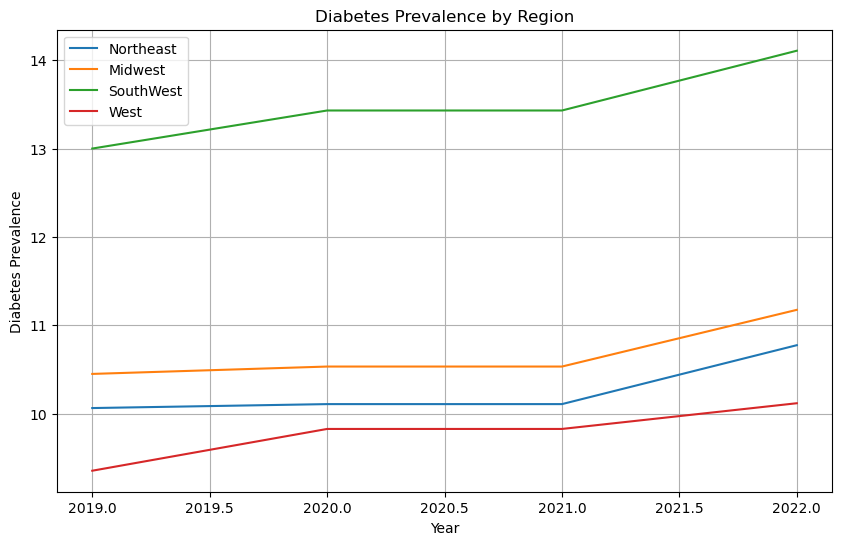

In [9]:
#plot the data
plt.figure(figsize=(10, 6))
plt.plot(mean_northeast['YearEnd'], mean_northeast['DataValue'], label='Northeast')
plt.plot(mean_midwest['YearEnd'], mean_midwest['DataValue'], label='Midwest')
plt.plot(mean_southwest['YearEnd'], mean_southwest['DataValue'], label='SouthWest')
plt.plot(mean_west['YearEnd'], mean_west['DataValue'], label='West')
plt.title('Diabetes Prevalence by Region')
plt.xlabel('Year')
plt.ylabel('Diabetes Prevalence') # in percentage / Definition. Prevalence is the proportion of a population who have a specific characteristic in a given time period.

plt.legend()
plt.grid()
plt.show()

In [71]:
#Forcast the next 2 years
#Northeast
#Midwest
#Southwest
#West
df_prophet = df[['YearEnd', 'DataValue']].rename(columns={'YearEnd': 'ds', 'DataValue': 'y'})
#.set_index('ds')


#Convert the year to datetime
#df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.year
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

In [72]:
df_prophet

,ds,y
0,2019-01-01,11.1
1,2019-01-01,14.0
2,2019-01-01,7.3
3,2019-01-01,10.9
4,2019-01-01,13.6
...,...,...
50,2022-01-01,12.8
51,2022-01-01,9.7
52,2022-01-01,17.4
53,2022-01-01,10.3


In [73]:
#Initializ the Prophet model
m = Prophet()

#Fit the model
m.fit(df_prophet)


19:44:36 - cmdstanpy - INFO - Chain [1] start processing
19:44:36 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
#Create a future dataframe
future = m.make_future_dataframe(periods=2, freq='y')

#Prdict future values
forecast = m.predict(future)

In [75]:
#Futue data
future

,ds
0,2019-01-01
1,2020-01-01
2,2021-01-01
3,2022-01-01
4,2022-12-31
5,2023-12-31


c:\Users\azamora\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\azamora\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


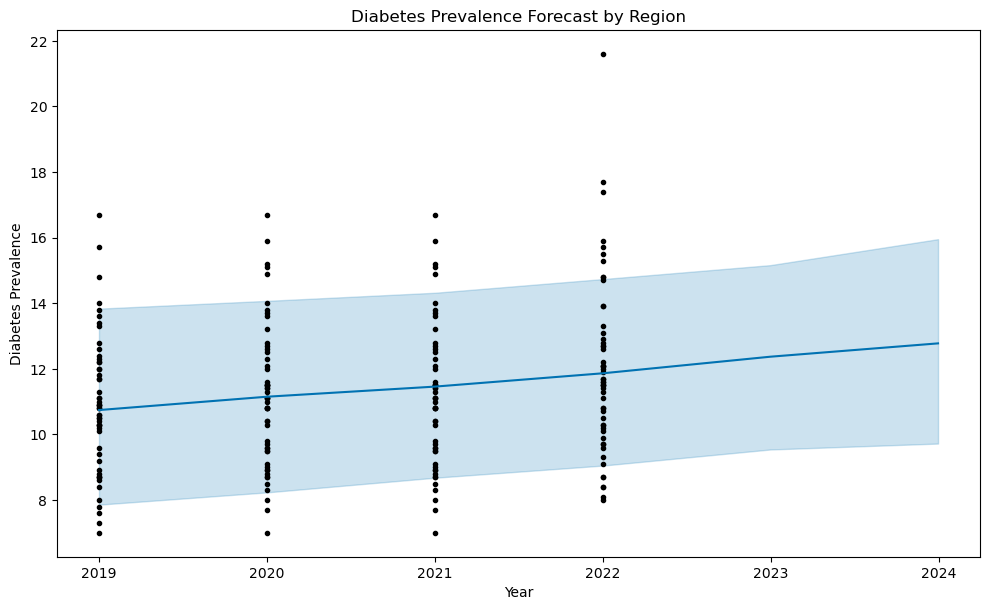

In [76]:
#plot the forecast
fig1 = m.plot(forecast)
plt.title('Diabetes Prevalence Forecast by Region')
plt.xlabel('Year')
plt.ylabel('Diabetes Prevalence')
plt.grid()
plt.show()


In [77]:
regions = df['Region'].unique()

for region in regions:
    df_region = df_prophet[df_prophet['Region'] == region]
    m = Prophet()
    m.fit(df_region)
    future = m.make_future_dataframe(periods=2, freq='y')
    forecast = m.predict(future)
    fig1 = m.plot(forecast)
    plt.title(f'Diabetes Prevalence Forecast for {region}')
    plt.xlabel('Year')
    plt.ylabel('Diabetes Prevalence')
    plt.grid()
    plt.show()

KeyError: 'Region'